In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/sample_data/new_insurance_data (1) (1).csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
data.isna().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1.287000e+03,1287.000000
mean,39.419580,30.655746,1.094794,33498.578933,15.247086,9.113778e+05,1.579929e+07,1.068376,3.727972e+08,13366.072420
std,14.051987,6.086323,1.202782,15611.720348,7.457366,9.083364e+04,2.653821e+07,0.529079,5.655770e+08,12025.821700
min,18.000000,15.960000,0.000000,2912.590584,1.000000,6.991570e+05,2.945253e+04,0.000000,3.150786e+06,1121.873900
25%,27.000000,26.220000,0.000000,20905.974820,9.000000,8.489270e+05,4.114357e+06,1.000000,7.964523e+07,4842.251225
50%,40.000000,30.360000,1.000000,33968.774160,15.000000,9.152840e+05,7.567064e+06,1.000000,1.451129e+08,9549.565100
75%,51.000000,34.600000,2.000000,45152.414195,20.000000,9.726140e+05,1.093014e+07,1.000000,3.337660e+08,16964.132700
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
ftr=[]                       ## no need of this
for i in data.columns:
  if data[i].dtypes=='float64' or data[i].dtypes=='int64':
    ftr.append(i)

In [ ]:
ftr

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [ ]:
data1=pd.DataFrame(ftr)
data1

,0
0,age
1,bmi
2,children
3,Claim_Amount
4,past_consultations
5,num_of_steps
6,Hospital_expenditure
7,NUmber_of_past_hospitalizations
8,Anual_Salary
9,charges


In [ ]:
data.shape

(1287, 13)

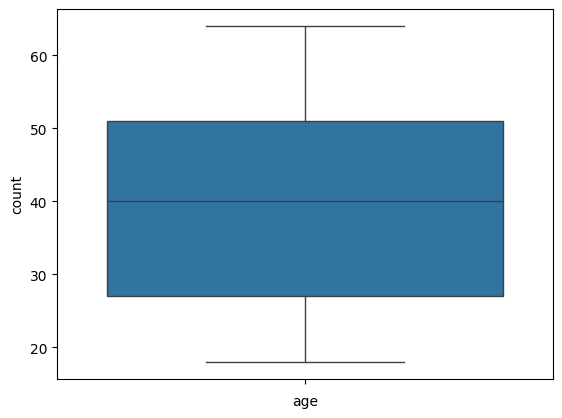

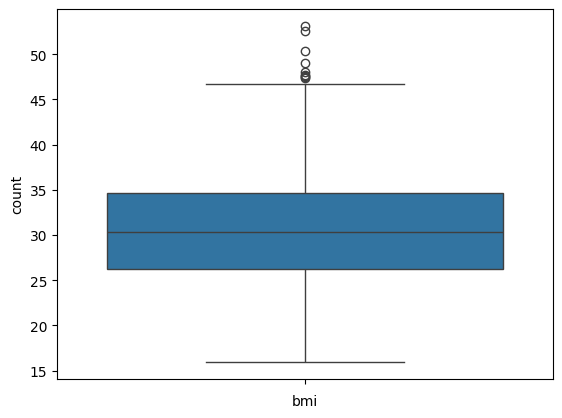

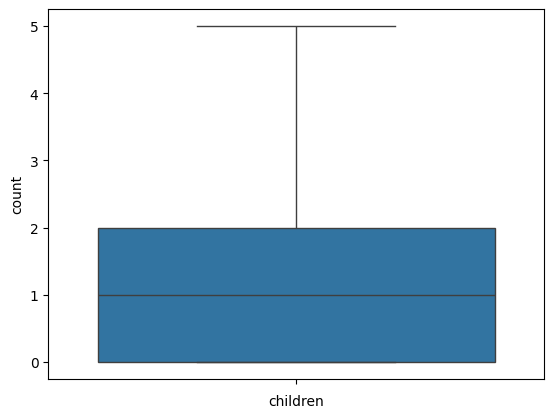

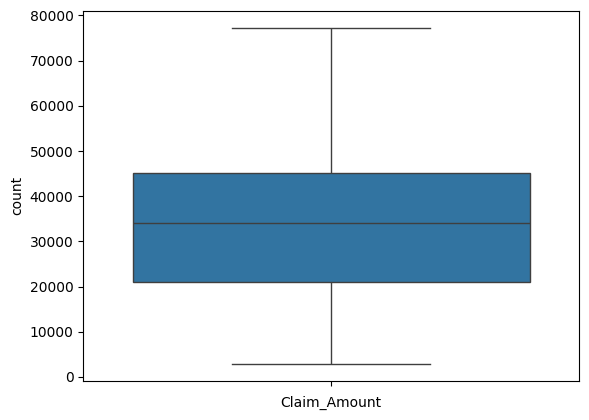

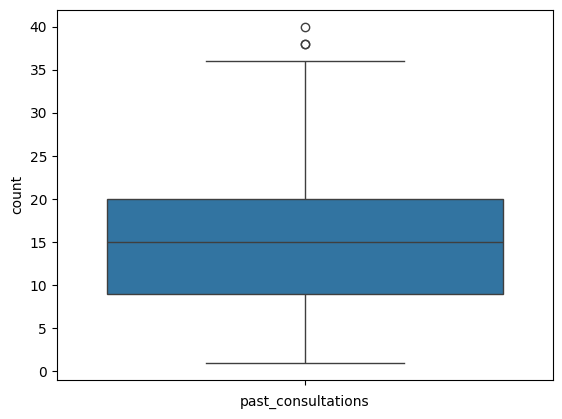

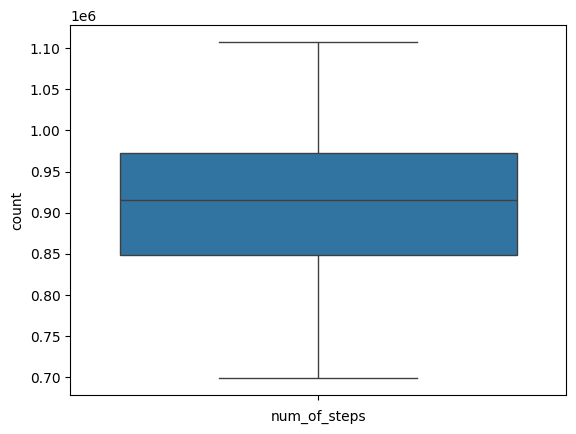

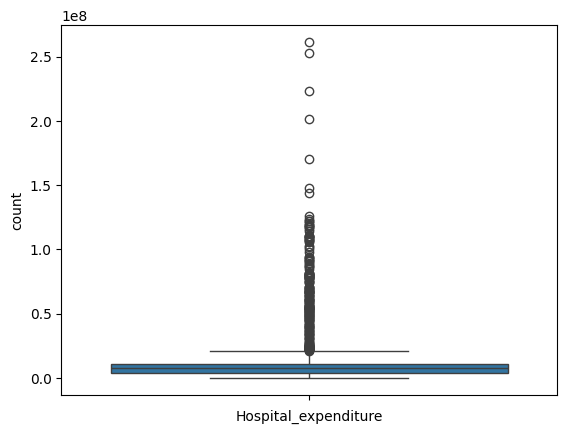

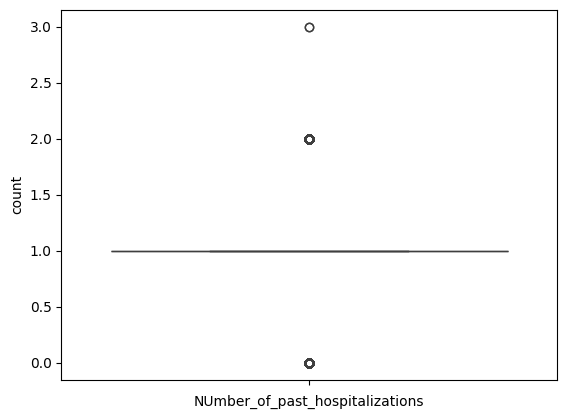

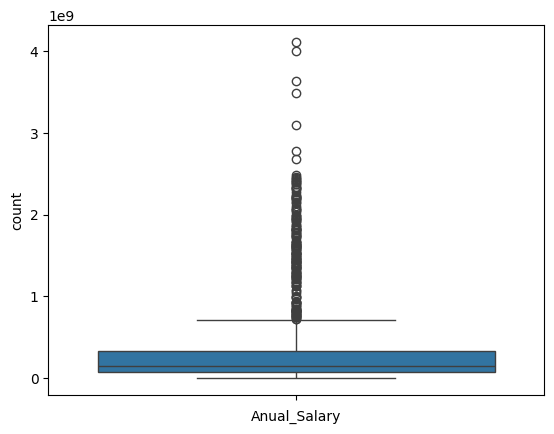

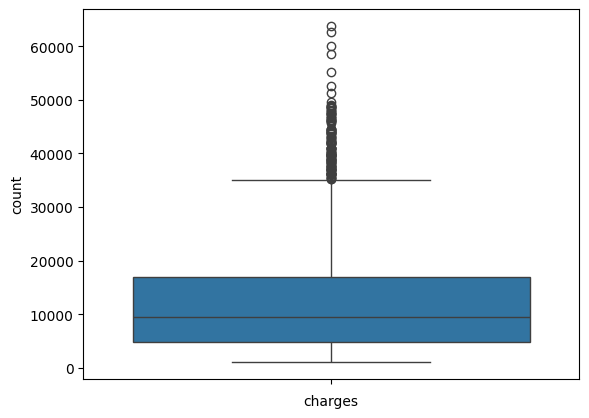

In [ ]:
for i in data.columns:
  if data[i].dtypes=='float64' or data[i].dtypes=='int64':    ## no need of outlier in this case
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop(['age','bmi','children'],axis=1)
y=data.iloc[:,-1]

In [ ]:
x.head()

,sex,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,male,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,male,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,male,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,male,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,male,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
y.head()

,charges
0,1121.8739
1,1131.5066
2,1135.9407
3,1136.3994
4,1137.0110


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])

In [ ]:
x.head()

,sex,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,male,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,male,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,male,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,male,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,male,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2,1137.0110


In [ ]:
x1=data.drop(['age','bmi','children','charges'],axis=1)
y1=data['charges']

In [ ]:
x1.head()

,sex,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,1,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2
1,1,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2
2,1,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2
3,1,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2
4,1,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2


In [ ]:
y1.head()

,charges
0,1121.8739
1,1131.5066
2,1135.9407
3,1136.3994
4,1137.0110


In [ ]:
x2train,x2test,y2train,y2test=train_test_split(x1,y1,test_size=0.20,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x2train=sc.fit_transform(x2train)
x2test=sc.fit_transform(x2test)

In [ ]:
y2train

,charges
385,5354.07465
1134,24873.38490
803,11411.68500
149,2497.03830
295,4350.51440
...,...
1088,21348.70600
1139,25333.33284
1174,29330.98315
902,12982.87470


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x2train,y2train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x2test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score=r2_score(y2test,y_pred)

In [ ]:
r2_score

0.9905861083679266

In [ ]:
data2

,charges
False,NaN
False,NaN
False,NaN
False,NaN
False,NaN
...,...
False,NaN
False,NaN
False,NaN
False,NaN
